In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
from IPython.display import Image
%matplotlib inline

Using TensorFlow backend.


# Neuron

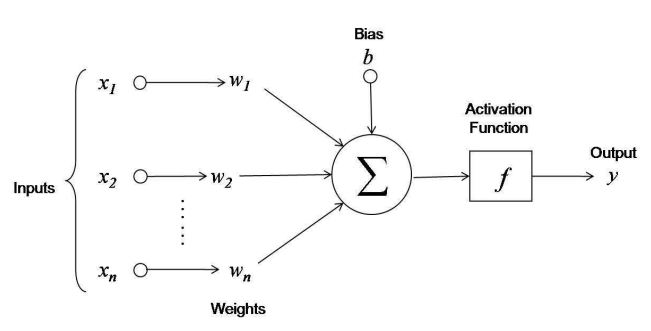

In [2]:
Image('./neuron.jpg')

Thus, a simple neuron is given by:
$$y = f\Bigg(\sum_{i=1}^n x_i \cdot w_i + b\Bigg)$$

This can be rewritten as:
$$y = f(Wx + b)$$

where $x \in \mathbb{R}^n$, $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}$.

$f$ is the so-called activation function. Typically, is one of: `sigmoid`, `tanh`, `relu`, `softmax` or `identity`.


The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


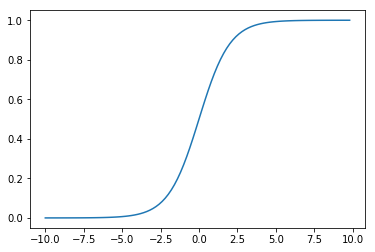

In [3]:
# Sigmoid
x = np.arange(-10., 10., 0.2)
sigmoid = lambda t: 1/(1 + np.exp(-t))
_ = plt.plot(x, sigmoid(x))

Used when you want the output to lie beteween [0, 1].

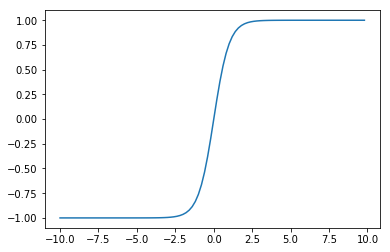

In [4]:
# tanh
x = np.arange(-10., 10., 0.2)
_ = plt.plot(x, np.tanh(x))

Used when you want the output to lie beteween [-1, 1].

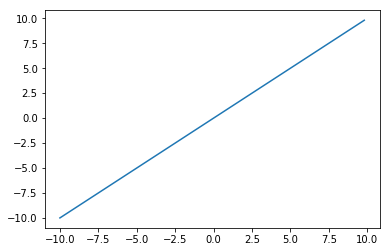

In [5]:
# Identity
x = np.arange(-10., 10., 0.2)
_ = plt.plot(x, x)

No non-linearity. (*Linear Regression*).

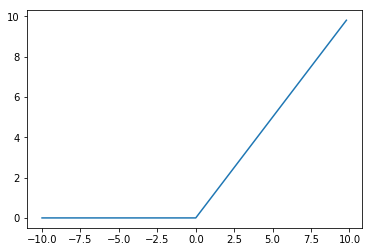

In [6]:
# ReLU (Rectified Linear Unit)
x = np.arange(-10., 10., 0.2)
relu = lambda t: np.max(np.concatenate([np.expand_dims(t, 1),
                        np.expand_dims(np.zeros_like(t), 1)], axis=1), axis=1)
_ = plt.plot(x, relu(x))

Output confined to the positive half space. Empirically shown to work well in deep networks.

**Softmax activation**

$$\sigma : \mathbb{R}^N \rightarrow [0, 1]^N$$

$$\sigma(z)_i = \frac{e^{z_i}}{\sum_{n=1}^N e^{z_n}}$$

Note that the output of the softmax activation function yields a PMF!

# Tensorflow

In [7]:
# Let's get some data!
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
print 'Train:', x_train.shape, y_train.shape
print 'Test: ', x_test.shape, y_test.shape

Train: (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


In [9]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

Build the network

In [10]:
# Create variables to store W, b
W = tf.get_variable('w', shape=(28*28, 10))
b = tf.get_variable('b', shape=(10))

In [11]:
# Create placeholder for the input
x = tf.placeholder(tf.float32, shape=(None, 28, 28), name='input')

In [12]:
# Resize the input
x_ = tf.reshape(x, (-1, 28*28))

In [13]:
# Create the neuron with a sigmoid activation
y = tf.nn.softmax(tf.matmul(x_, W) + b)

Set up the session

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Test it out!

In [15]:
probability_scores = sess.run(y, {x: x_train[0:100]})
print 'Sanity check, sum:', probability_scores.sum()

Sanity check, sum: 100.0


**Loss function:**

We train the network by minimizing a "loss function". We calculate the loss by comparing the produced scores with the ground truth.

In [16]:
target = tf.placeholder(tf.float32, shape=(None, 10), name='target')

$$\text{Loss} = (\text{Expected} - \text{Prediction}) ^ 2$$

In [17]:
# Use the squared error
loss = tf.reduce_mean(tf.square(target - y))

Now, we simply minimize the error using an optimizer:

In [18]:
optimizer = tf.train.AdamOptimizer()
train_op = optimizer.minimize(loss)

**Training** is as simple as looping over the input examples and invoking the optimizer at each step:

In [19]:
# For Adam's variables
sess.run(tf.global_variables_initializer())

for epoch in range(100):
    loss_history = []
    
    for i in range(600):
        this_target = np.zeros((100, 10), dtype=np.float32)

        for j in range(100):
            this_target[j,y_train[i*100 + j]] = 1.0

        _, l = sess.run((train_op, loss), {x: x_train[i*100:(i+1)*100],
                                           target: this_target})

        loss_history.append(l)
    
    if (epoch + 1) % 10 == 0:
        print 'Epoch:', epoch+1, 'Loss:', np.mean(loss_history)

Epoch: 10 Loss: 0.0106831
Epoch: 20 Loss: 0.00977005
Epoch: 30 Loss: 0.00930719
Epoch: 40 Loss: 0.00899958
Epoch: 50 Loss: 0.00877346
Epoch: 60 Loss: 0.00859168
Epoch: 70 Loss: 0.00843803
Epoch: 80 Loss: 0.00830414
Epoch: 90 Loss: 0.00818797
Epoch: 100 Loss: 0.00808606


**Testing** is simple too:

In [20]:
accuracy = []

for i in range(100):
    pred = sess.run(tf.argmax(y, axis=1), {x: x_test[i*100:(i+1)*100]})
    accuracy.append(np.mean(np.equal(pred, y_test[i*100:(i+1)*100])))

In [21]:
print 'Accuracy:', np.mean(accuracy)

Accuracy: 0.9322
